In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/MAGI/Desktop/Pokemon.csv')

In [3]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
# Preparing data
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values
y = df['Legendary']

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.3)

# Scale
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
# Creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Bool to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Adjust weights
class_weights = {0: 1, 1: 15} 

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), class_weight=class_weights)

C:\Users\MAGI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.0881 - loss: 1.1898 - val_accuracy: 0.1161 - val_loss: 0.7538
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1117 - loss: 1.3611 - val_accuracy: 0.1000 - val_loss: 0.7816
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0848 - loss: 1.2691 - val_accuracy: 0.0982 - val_loss: 0.7911
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0757 - loss: 1.2286 - val_accuracy: 0.0982 - val_loss: 0.8002
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0929 - loss: 1.3974 - val_accuracy: 0.0982 - val_loss: 0.8044
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0768 - loss: 1.2074 - val_accuracy: 0.0982 - val_loss: 0.7995
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0809 - loss: 1.3057 - val_accuracy: 0.1018 - val_loss: 0.8058
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0794 - loss: 1.2550 - val_accuracy: 0.1036 - val_loss

In [10]:
from tensorflow.keras.models import save_model
save_model(model, 'pokemonlegendary.keras')

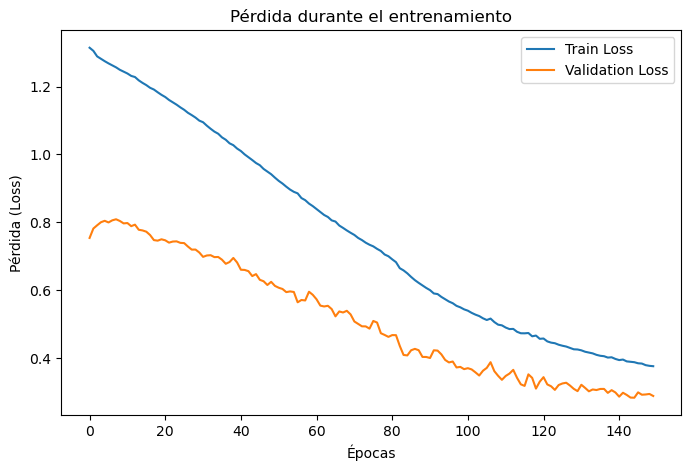

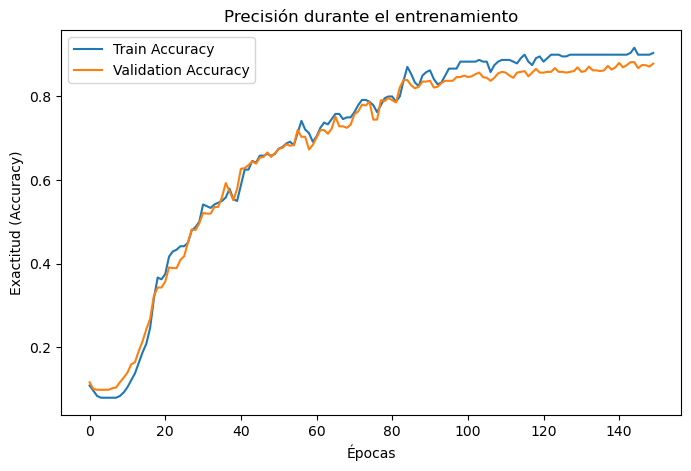

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graphic loss
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.legend()
plt.show()

# Graphic accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Precisión durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Exactitud (Accuracy)")
plt.legend()
plt.show()

In [12]:
# Define function
def predict_legendary(new_data):
    # Convert to array & scale
    new_sc = scaler.transform(np.array(new_data).reshape(1, -1))
    # Predict prob
    prob = model.predict(new_sc)[0][0]
    # Evaluate
    legend = prob >= 0.5
    print("Probabilidad de ser legendario:", prob)
    print("¿Es legendario?:", legend)

In [19]:
# Use function
new = [[530, 95, 115, 90, 80, 90, 60]]
predict_legendary(new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Probabilidad de ser legendario: 0.18351537
¿Es legendario?: False


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


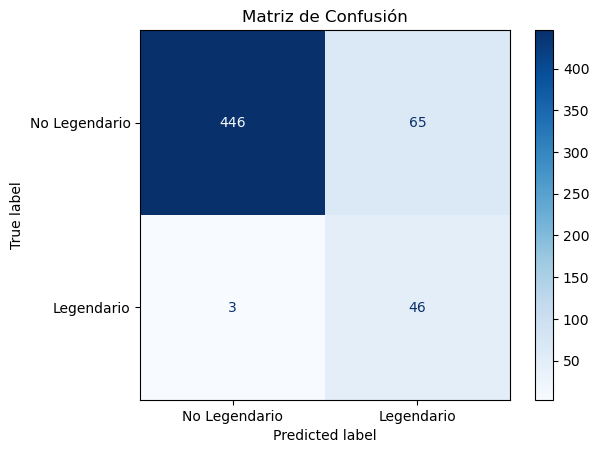

               precision    recall  f1-score   support

No Legendario       0.99      0.87      0.93       511
   Legendario       0.41      0.94      0.57        49

     accuracy                           0.88       560
    macro avg       0.70      0.91      0.75       560
 weighted avg       0.94      0.88      0.90       560



In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on test data
test_pred = model.predict(X_test).ravel()

# Convert to binary (0 o 1)
test_pred_bin = (test_pred >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, test_pred_bin)

# Grapich confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Legendario', 'Legendario'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Classification report:  precision, recall & F1-score
print(classification_report(y_test, test_pred_bin, target_names=['No Legendario', 'Legendario']))
